In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

# Simple Impact-T Run

In [2]:
from impact import Impact, template_dir
import os

In [3]:
ifile = os.path.join(template_dir,'lcls_injector/ImpactT.in')
os.path.exists(ifile)

True

In [4]:
# Make Impact object
I = Impact(ifile, verbose=True)

================ Impact-T Summary ================
1 bunchtotal charge: 249.99999999999997 pC
Distribution type: read
Cathode start at z = 0 m
   emission time: 1.4e-11 s
   image charges neglected after z = 0.02 m
Tracking 10000 particles
Processor domain: 2 x 2 = 4 CPUs
Computational domain: 0.015 m x 0.015 m x 45.0 m
Space charge grid: 16 x 16 x 16
Maximum time steps: 1000000
Random Seed: 6
Reference Frequency: 2856000000.0 Hz
Initial reference time: 0.0 s
Simulation starting from the beginning


Configured to run in: /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmpdxllhk_x


In [5]:
# Change some things
I.input['header']['Np'] = 10000
I.input['header']['Nx'] = 16
I.input['header']['Ny'] = 16
I.input['header']['Nz'] = 16
I.input['header']['Dt'] = 5e-13

# Other switches
I.timeout = 1000
# Switches for MPI
I.use_mpi=True
I.input['header']['Nprow'] = 1
I.input['header']['Npcol'] = 4
I.impact_bin = '$IMPACTT_MPI_BIN'
assert os.path.exists(os.path.expandvars(I.impact_bin))

In [6]:
# Change stop location
I.ele['stop_1']['s'] = 0.1
#I.ele['stop_1']['s'] = I.ele['OTR2']['s']+.001

In [7]:
I.run()

Running Impact-T in /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmpdxllhk_x
Loaded fort 30 : Fourth root of the fourth moments of the beam distribution
Loaded fort 25 : RMS Y information
Loaded fort 24 : RMS X information
Loaded fort 26 : RMS Z information
Loaded fort 28 : Load balance and loss diagnostics
Loaded fort 29 : Cube root of third moments of the beam distribution
Loaded fort 18 : Time and energy
Loaded fort 27 : Max amplitude information
Loaded fort 70 : Slice information of the final distribution
Loaded fort 60 : Slice information of the initial distribution
Loading particles
Loaded fort 40 : initial particle distribution at t = 0
Loaded fort 50 : final particle distribution projected to the centroid location of the bunch


In [8]:
I.particles.keys()

dict_keys(['initial_particles', 'final_particles'])

In [9]:
I.particles.keys()

dict_keys(['initial_particles', 'final_particles'])

In [10]:
I.output['stats'].keys()

dict_keys(['t', 'z', 'x_moment4', 'GBx_moment4', 'y_moment4', 'GBy_moment4', 'z_moment4', 'GBz_moment4', 'y_centroid', 'y_rms', 'GBy_centroid', 'GBy_rms', 'y_twiss', 'y_normemit', 'x_centroid', 'x_rms', 'GBx_centroid', 'GBx_rms', 'x_twiss', 'x_normemit', 'z_centroid', 'z_rms', 'GBz_centroid', 'GBz_rms', 'z_twiss', 'z_normemit', 'numparticles_min', 'numparticles_max', 'numparticles', 'x_moment3', 'GBx_moment3', 'y_moment3', 'GBy_moment3', 'z_moment3', 'GBz_moment3', 'gamma', 'E_kinetic', 'beta', 'r_max', 'deltaGamma_rms', 'x_max', 'GBx_max', 'y_max', 'GBy_max', 'z_max', 'GBz_max'])

In [11]:
I.output['slice_info']

{'final_particle_slices': {'slice_z': array([-1.062351e-03, -9.207046e-04, -7.790577e-04, -6.374109e-04,
         -4.957640e-04, -3.541171e-04, -2.124703e-04, -7.082343e-05,
          7.082343e-05,  2.124703e-04,  3.541171e-04,  4.957640e-04,
          6.374109e-04,  7.790577e-04,  9.207046e-04,  1.062351e-03]),
  'particles_per_cell': array([  15.87965,  109.3777 ,  294.7412 ,  472.5653 ,  701.8577 ,
          814.9347 ,  937.0664 , 1005.016  , 1070.948  , 1030.276  ,
          983.0311 ,  903.3339 ,  740.5388 ,  552.323  ,  311.6374 ,
           56.47337]),
  'current': array([ 0.8402217,  5.78738  , 15.59531  , 25.00431  , 37.1366   ,
         43.11972  , 49.58193  , 53.17727  , 56.66585  , 54.51383  ,
         52.01401  , 47.79708  , 39.18329  , 29.22444  , 16.48932  ,
          2.988112 ]),
  'x_emittance': array([4.963899e-06, 9.715954e-06, 2.070892e-05, 3.084760e-05,
         4.122038e-05, 5.068403e-05, 5.816706e-05, 6.229254e-05,
         6.250353e-05, 6.180396e-05, 5.713029e-0

# Plot

In [12]:
from bokeh.plotting import output_notebook
from bokeh.plotting import show
output_notebook(hide_banner=True)

from bokeh.plotting import figure
from bokeh.layouts import column, row
from bokeh.models import ColumnDataSource, Range1d
from impact.parsers import load_many_fort
from impact.parsers import UNITS

from impact.plotting import layout_plot


ds = ColumnDataSource(I.output['stats'])

In [13]:
# Change somethone
I.ele['QE01']['b1_gradient'] = 0
layout = layout_plot(I.input['lattice'], plot_height=300)
show(layout)

In [14]:
def plot1(y_axis, x_axis='z', source=ds):
    yunit = UNITS[y_axis]
    ylabel = y_axis+' ('+yunit+')'
    
    xunit = UNITS[x_axis]
    xlabel = x_axis+' ('+xunit+')'
    p = figure(plot_width=600, plot_height=200, x_axis_label=xlabel, y_axis_label=ylabel)
    p.line( x_axis, y_axis, source=source, color='red')
    return p
show(plot1('gamma'))

# Archiving

In [15]:
from impact import writers
import h5py

In [16]:
# This is the total bunch charge in Coulombs
total_charge = I.input['header']['Bcurr'] / I.input['header']['Bfreq']
total_charge

2.4999999999999996e-10

In [17]:
I.particles

{'initial_particles': array([(-0.000231  , -0.00049603, -8.7012500e-05,  1.3489813e-04, -1.5400278e-06, 0.001978),
        ( 0.00043612,  0.00126158,  3.2937175e-04, -5.7131252e-04, -2.7340319e-06, 0.001978),
        ( 0.00040615,  0.00102199,  3.8438809e-04,  7.9314477e-04, -1.7480634e-06, 0.001978),
        ...,
        ( 0.00019059, -0.00135424,  6.4437180e-06, -9.8451886e-06, -2.3828392e-06, 0.001978),
        (-0.00037397,  0.00144889, -2.0164375e-04,  8.9741137e-04, -1.9571324e-06, 0.001978),
        (-0.00038447, -0.00013964,  1.0404854e-04, -4.2386647e-04, -1.3655324e-06, 0.001978)],
       dtype=[('x', '<f8'), ('GBx', '<f8'), ('y', '<f8'), ('GBy', '<f8'), ('z', '<f8'), ('GBz', '<f8')]),
 'final_particles': array([(4.67226356e-04, 0.11475451, -0.00183853, -0.13896846, 0.09972124, 11.54846461),
        (2.37251469e-05, 0.08551776, -0.00200628, -0.16801213, 0.1004163 , 11.57251516),
        (8.36037226e-04, 0.13453899, -0.00155783, -0.10105703, 0.09953615, 11.54085609),
        .

In [18]:
h5 = h5py.File('test.h5', 'w')

In [19]:
I.archive(h5)

Archiving initial_particles with charge 2.4999999999999996e-10
Archiving final_particles with charge 2.4999999999999996e-10


In [20]:
h5.close()

# Reading archive

In [21]:
# Reading input
from impact.readers import read_input_h5

In [22]:
h5 = h5py.File('test.h5', 'r')

In [23]:
input = read_input_h5(h5['input/'])
list(input)

['header', 'lattice', 'input_particle_file', 'fieldmaps']

In [24]:
list(input['fieldmaps'])

['rfdata102', 'rfdata201', 'rfdata4', 'rfdata5', 'rfdata6', 'rfdata7']

# Read and Plot Particles

In [25]:
from pmd_beamphysics import ParticleGroup
from pmd_beamphysics.plot import marginal_plot

In [26]:
list(h5)

['input', 'particles', 'run_info', 'slice_info', 'stats']

In [27]:
list(h5['particles'])
bunch1 = h5['particles/final_particles']

In [28]:
PG = ParticleGroup(bunch1)

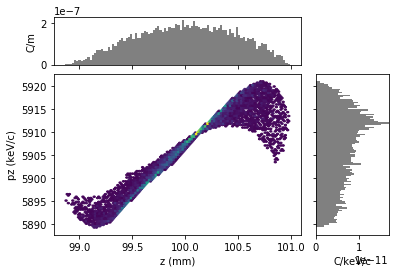

In [31]:
marginal_plot(PG, 'z', 'pz')

In [30]:
# Cleanup
os.remove('test.h5')